# Statistical Pattern Recognition - Solution 2: Parametric distributions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import markers

## $\star$ Part 1: Pen and Paper exercise

Verify the ML estimator for the Bernoulli distribution given in the lecture slides.

*Solution:*

See `ex2.pdf` for the solution.

## $\star$ Part 2: ML estimation

Estimate the mean and covariance matrix of the dataset *gaussian.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues.
Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

### Part 2.1: Mean and Covariance estimation

Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.


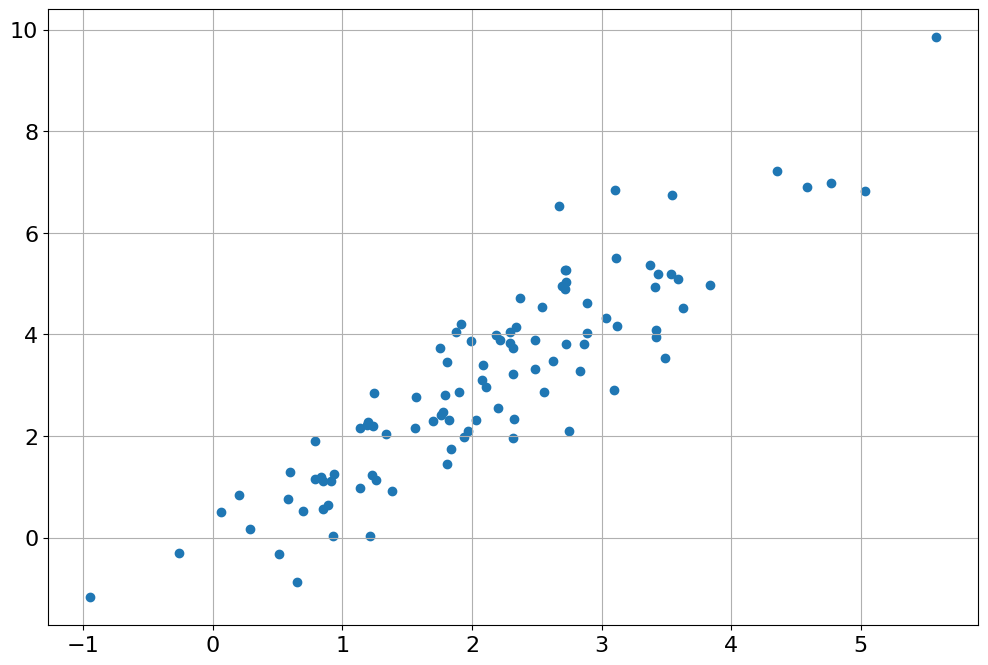

In [2]:
# Load the data

# START TODO #################
data = np.load('../data/gaussian.npz')
gaussian = data["arr_0"]

plt.rc('font', size=16) 
plt.figure(figsize=(12, 8))
plt.scatter(gaussian[:, 0], gaussian[:, 1])   # look at how the data is distributed
plt.grid()
plt.show()
# END TODO #################


*Solution:*

Our data is of shape `(N_datapoints, D_features)` so to find the mean we sum over the datapoints over the first axis and divide over the number of datapoints.

In [3]:
# Estimate the mean and compare your result with numpy's built-in function 

# START TODO #################
N = len(gaussian)
mean = np.sum(gaussian, axis=0) / N
print(f"The estimated mean is: {mean}")

# compare result with numpy built in mean function
true_mean = np.mean(gaussian, axis=0)
print(f"The mean calculated using np.mean is: {true_mean}")
print()
# END TODO #################

The estimated mean is: [2.12308534 3.12168402]
The mean calculated using np.mean is: [2.12308534 3.12168402]



*Solution:*

Note that the slides are using column vectors of shape `(D, N)`, so we need to change the covariance formula to fit our data of shape `(N, D)`.

**Covariance formula:**

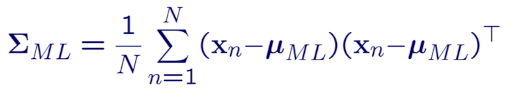

In [5]:

# Estimate the covariance and compare your result with numpy's built-in function 

# START TODO #################

# Option 1: Expand the data and do an outer product of all N vectors, then sum over datapoints.
gaussian_expanded = gaussian[:, :, None]  # shape (100, 2, 1)
mean_expanded = mean[None, :, None]  # shape (1, 2, 1)

diff = gaussian_expanded - mean_expanded  # shape (100, 2, 1)
diff_t = np.transpose(diff, axes=(0, 2, 1))  # shape (100, 1, 2)

prod = diff @ diff_t  # shape (100, 2, 2)
cov = 1/N * np.sum(prod, axis=0)  # shape (2, 2)

print("The estimated covariance using method 1 is:")
print(cov)
print()

# Option 2: Do the sum directly using matrix multiplication.
# shapes: (2, 100) @ (100, 2) = (2, 2)
cov = 1 / N * np.matmul((gaussian - mean).T, (gaussian - mean))
print("The estimated covariance using method 2 is:")
print(cov)
print()

# compare to numpy cov function, slightly different since NP uses the N-1 bias correction
# np.cov expects data of shape (D, N) so we transpose the data
true_cov = np.cov(gaussian.T)        
print("The covariance calculated using Numpy is:")
print(true_cov)
# END TODO #################

The estimated covariance using method 1 is:
[[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]

The estimated covariance using method 2 is:
[[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]

The covariance calculated using Numpy is:
[[1.35117126 2.10306646]
 [2.10306646 4.02666029]]


### Part 2.2: Plotting the graph

Plot the points and indicate the mean via a cross and the covariance via an ellipse.


[2.12308534 3.12168402]


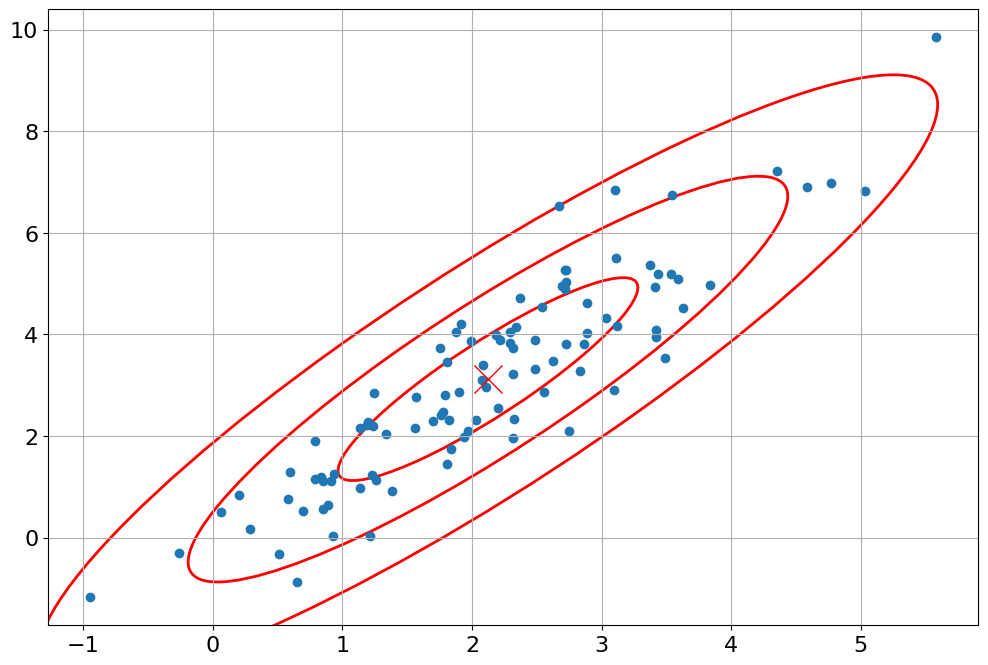

In [6]:
# START TODO #################

def plot_gaussian(ax, mean, cov, color='red', size=3):
    # draws ellipses representing different standard deviations (size is the number of ellipses)
    # width and height are times by 2 since sqrt of the eigenval only measures half the distance
    eig_w, eig_v = np.linalg.eig(cov)
    # eigenvectors are orthogonal so we only need to check the first one
    eig_v_0 = eig_v[0]
    # arccos of first eigenvectors x coordinate will give us the angle
    angle = np.arccos(eig_v_0[0])
    # however, this only works for angles in [0, pi]
    # for angles in [pi, 2*pi] we need to consider the
    # y coordinate, too
    if eig_v_0[1] > 0:
        angle = 2 * np.pi - angle
    angle = np.rad2deg(angle)
    
    for i in range(size):
        ell = Ellipse(xy=[mean[0], mean[1]], 
                      width=np.sqrt(eig_w[0]) * 2 * (i + 1), 
                      height=np.sqrt(eig_w[1]) * 2 * (i + 1), 
                      angle=angle, 
                      edgecolor=color, lw=2, facecolor='none')
        ax.add_artist(ell)
    print(mean)
    ax.plot(mean[0], mean[1], "x", c=color, ms=20)
    

def plot_with_eig(samples, mean, cov):
    fig, ax = plt.subplots(figsize=(12, 8))
    plot_gaussian(ax, mean, cov)
    plt.scatter(samples[:, 0], samples[:, 1])
    plt.grid()
    plt.show()

plot_with_eig(gaussian, mean, cov)

# END TODO #################

## $\star\star$ Part 3: MAP estimation

Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come in.


### Part 3.1: Using the correct prior

Using   $\mu_0 = (2,3)^T $

For the formulae for the multivariate Gaussian MAP estimate given mean prior, covariance prior and true covariance see:

[0] [https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf) page 17 equation (211)

[1] [https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf) Page 17 equation(212)

For details see Christopher M. Bishop, Pattern Recognition and Machine Learning, p. 92.


In [7]:
# Estimate the ML and MAP mean

# START TODO #################

def estimate_ml_and_map_mean(gaussian, n_reduction, cov, prior_mean):
    gaussian_n = gaussian[0:n_reduction, :]  # create a reduced dataset
    prior_cov = cov  # use cov estimated via ML from the full 100pts as cov prior
    ml_mean_n = np.mean(gaussian_n, axis=0)  # esimate mean using numpy

    cov_n = np.linalg.inv(np.linalg.inv(prior_cov) + n_reduction * np.linalg.inv(cov))  # see [0]
    map_mean_n = cov_n @ ( n_reduction * (np.linalg.inv(cov) @ ml_mean_n) + 
                          (np.linalg.inv(prior_cov) @ prior_mean))  # see [1]

    print(f"The MAP mean estimate from {n_reduction} data points is {map_mean_n}")
    return ml_mean_n, map_mean_n

# END TODO #################

The MAP mean estimate from 2 data points is [2.79051738 4.17201882]
The MAP mean estimate from 5 data points is [2.21560731 3.29619296]
The MAP mean estimate from 10 data points is [2.56752927 4.00546172]


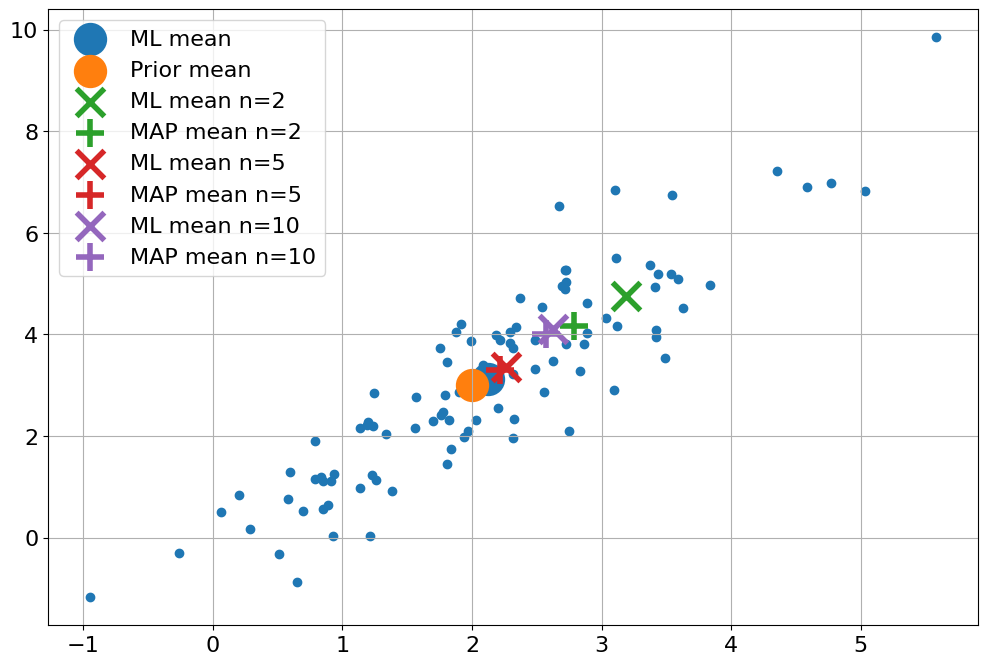

In [8]:
# Plot the datapoints and the ML and MAP mean estimates for different numbers of samples

# START TODO #################

# get the default color cycle from matplotlib
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
def get_color(i):
    return color_cycle[i % len(color_cycle)]

def estimate_and_plot_means(gaussian, ns, prior_mean, ml_mean):
    plt.figure(figsize=(12, 8))
    plt.scatter(gaussian[:, 0], gaussian[:, 1])
    plt.scatter(ml_mean[0], ml_mean[1], label=f"ML mean", c=get_color(0), marker="o", s=400, lw=4)
    plt.scatter(prior_mean[0], prior_mean[1], label=f"Prior mean", c=get_color(1), marker="o", s=400, lw=4)
    for i, n in enumerate(ns):
        ml_mean, map_mean = estimate_ml_and_map_mean(gaussian, n, cov, prior_mean)
        plt.scatter(ml_mean[0], ml_mean[1], label=f"ML mean n={n}", c=get_color(i+2), 
                    marker="x", s=400, lw=4)
        plt.scatter(map_mean[0], map_mean[1], label=f"MAP mean n={n}", c=get_color(i+2), 
                    marker="+", s=400, lw=4)
    plt.legend()
    plt.grid()
    plt.show()
    
prior_mean = np.array([2, 3])
estimate_and_plot_means(gaussian, [2, 5, 10], prior_mean, mean)

# END TODO #################

### Part 3.2: Using a slightly wrong prior

Using $\mu_0 = (2,5)^T $


The MAP mean estimate from 2 data points is [2.79051738 4.83868548]
The MAP mean estimate from 5 data points is [2.21560731 3.62952629]
The MAP mean estimate from 10 data points is [2.56752927 4.1872799 ]


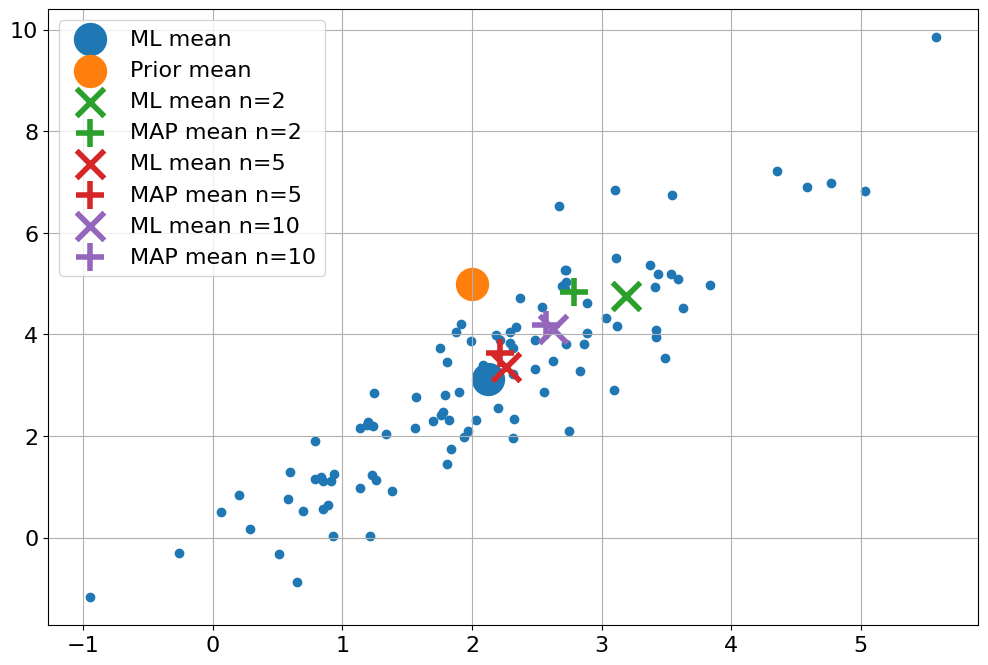

In [9]:
# START TODO #################

wrong_prior_mean = np.array([2, 5])

estimate_and_plot_means(gaussian, [2, 5, 10], wrong_prior_mean, mean)

# END TODO #################

## $\star$ Part 4: Gaussianplus

Estimate mean and covariance of the dataset *gaussianplus.npz* using ML and show the result.
How well does the estimate reflect the true data?


[2.78150432 3.4206865 ]


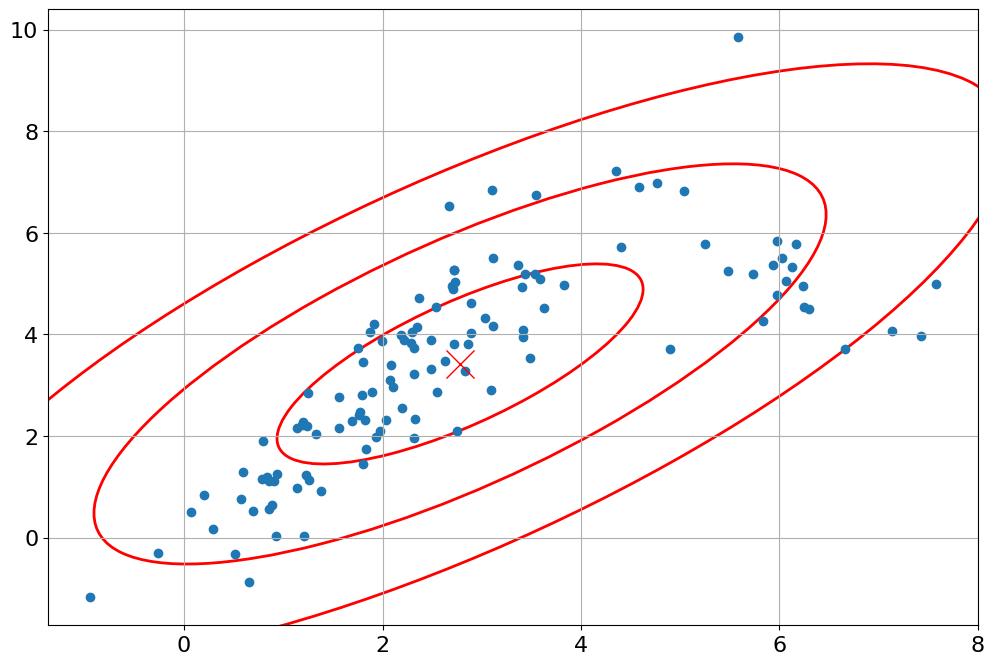

In [10]:
# START TODO #################

data = np.load('../data/gaussianplus.npz')
gaussianplus = data["arr_0"]

meanplus = np.mean(gaussianplus, axis=0)
covplus = np.cov(gaussianplus.T)   

plot_with_eig(gaussianplus, meanplus, covplus)

# END TODO #################